In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dataset import load_images, normalize, per_chan_avg, apply_masks
from nn_models import build_fcn_bilinear_8s, build_count_nn

%matplotlib inline

Using TensorFlow backend.


### Open and prep the data

In [44]:
# Create a list of image names you would like to count
img_path = './TrainingData/BBBC005_v1_images/BBBC005_v1_images/'
gt_path = './TrainingData/BBBC005_v1_ground_truth/BBBC005_v1_ground_truth/'
img_set = pd.read_csv('./TrainingData/demo_set.csv')

In [45]:
counts = img_set['count'].get_values()

In [46]:
# Import the desired dataset
# Get the original large images for our dataset
org_imgs = load_images(img_names=img_set.filename, file_path=img_path, preprocess='image', target_size=(224,224,3))
gt = load_images(img_names=img_set.filename, file_path=gt_path, preprocess='gt', target_size=(224,224))
nrm_imgs = np.array(org_imgs)

In [47]:
# Normalize the dataset
avgs = per_chan_avg(nrm_imgs)
normalize(nrm_imgs, avgs)

## Load the neural networks

In [48]:
# Create blob detector
blob_detector = build_fcn_bilinear_8s(nb_classes=1)

In [49]:
# Load the blob detector weights
blob_detector.load_weights('mod/fcn8s_weights_lg.hdf5')

In [50]:
# Create the count network
counter = build_count_nn(nb_classes=1)

In [51]:
# Load the counter weights
counter.load_weights('mod/iso_counter.hdf5')

## Start predicting counts

In [52]:
# Obtain the blob predictions
blobs = blob_detector.predict(nrm_imgs)

In [53]:
# Isolate the blobs
blob_imgs = apply_masks(org_imgs, blobs)

In [54]:
# Normalize the masked Data
avgs = per_chan_avg(arr=blob_imgs)
normalize(arr=blob_imgs, avgs=avgs)

In [55]:
# Generate counts
predicted_counts = counter.predict(blob_imgs)

## Take a look at the results

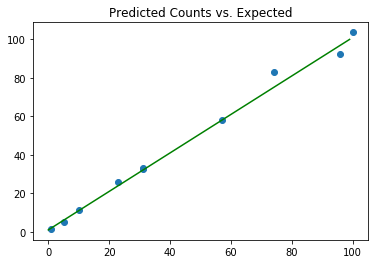

In [56]:
plt.scatter(counts, predicted_counts)
plt.plot((np.array(range(100)) + 1), color='g')
plt.title('Predicted Counts vs. Expected')

In [57]:
print(counts)

[ 57  23  96  10  74 100  31   5   1  31]


In [58]:
print(np.around(predicted_counts.squeeze()))

[  58.   26.   92.   11.   83.  104.   33.    5.    1.   33.]


In [42]:
im_num = 3

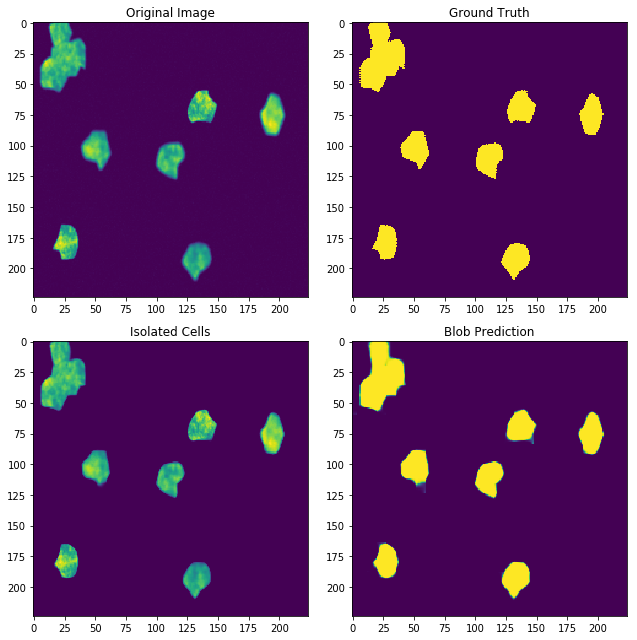

In [59]:
fig, a = plt.subplots(2, 2)
a[0][0].imshow(org_imgs[im_num,:,:,0])
a[0][0].set_title('Original Image')
a[0][1].imshow(gt[im_num,:,:,0])
a[0][1].set_title('Ground Truth')
a[1][0].imshow(blob_imgs[im_num,:,:,0])
a[1][0].set_title('Isolated Cells')
a[1][1].imshow(blobs[im_num,:,:,0])
a[1][1].set_title('Blob Prediction')
fig.set_size_inches(9, 9)
fig.tight_layout()